In [ ]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#!sudo cp -v -r "/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/" "/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext"

'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture'
'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/410.raw' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture/410.raw'
'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/DARKREF_410.raw' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture/DARKREF_410.raw'
'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/410.hdr' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture/410.hdr'
'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/DARKREF_410.hdr' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture/DARKREF_410.hdr'
'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/WHITEREF_410.hdr' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture/WHITEREF_410.hdr'
'/content/drive/MyDrive/ASI/Lab4/Task1/specim/capture/WHITEREF_410.raw' -> '/content/drive/MyDrive/ASI/Lab4/Task1/specim/ext/capture/WHITEREF_410.raw'


#Specim IQ (T1)

In [ ]:
# Read hdr
path = "/content/drive/MyDrive/ASI autumn 2022/Group1_session2/[Specim IQ]/Green samples/capture"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves] = read_hdr(object_hdr)

open_path = object_raw
# Read raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)

/content/drive/MyDrive/ASI autumn 2022/Group1_session2/[Specim IQ]/Green samples/capture/404.raw
512
512 512 204
19
20
224
spectral_image.shape:  (512, 204, 512)


Text(0.5, 1.0, 'Single spectrum')

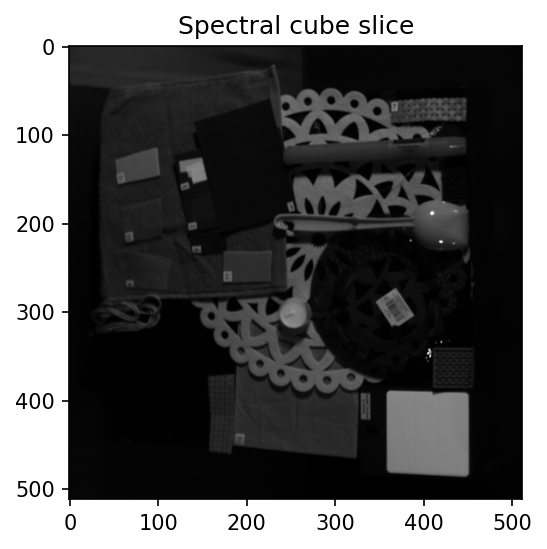

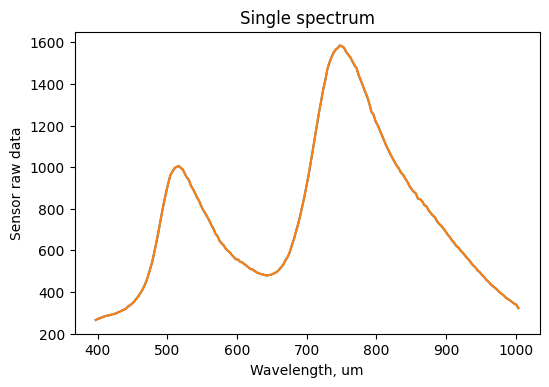

In [ ]:
# Plot picture and spectrum
plt.imshow(spectral_image[:,100,:], cmap="gray")
plt.title('Spectral cube slice')
plt.rcParams['figure.dpi'] = 100

plt.figure()
plt.plot(waves, spectral_image[100,:,100])
plt.plot(waves, spectral_image[100,:,100])#
plt.xlabel('Wavelength, um')
plt.ylabel('Sensor raw data')
plt.rcParams['figure.dpi'] = 150
plt.title('Single spectrum')


/content/drive/MyDrive/ASI autumn 2022/Group1_session2/[Specim IQ]/Green samples/capture/WHITEREF_404.hdr
512
512 1 204
28
29
233
512 204 1


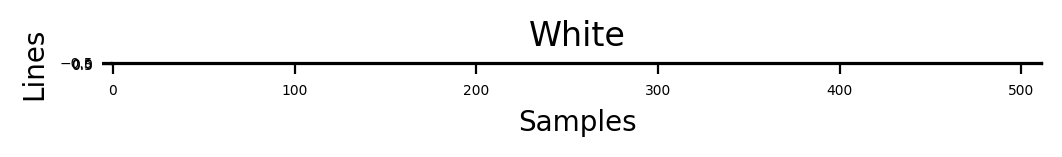

white samples, bands, and lines 512, 204, 1
512
512 1 204
19
20
224


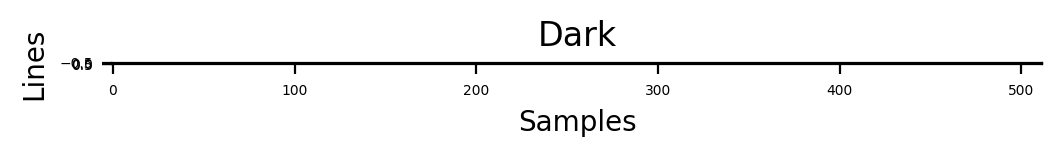

dark samples, bands, and lines 512, 204, 1


In [ ]:
# Read White
print(white_hdr)
[samples, bands, lines, waves] = read_hdr(white_hdr)
print(samples, bands, lines)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,100,:], cmap="gray", vmin=0, vmax=250)#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
print(f'white samples, bands, and lines {samples}, {bands}, {lines}')
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines

plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,100,:], cmap="gray")#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()
print(f'dark samples, bands, and lines {samples}, {bands}, {lines}')

In [ ]:
print(numpy.max(spectral_image))
print(numpy.min(spectral_image))

print(numpy.max(white_image))
print(numpy.min(white_image))

print(numpy.max(dark_image))
print(numpy.min(dark_image))

4095
240
2663.0
307.0
243.0
239.0


In [ ]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = numpy.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = numpy.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
spectral_cube = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = numpy.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = numpy.subtract(white_av, dark_av) 
# Subtract [image - dark]
for i in range(lines):
  spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube


(512, 204, 512)


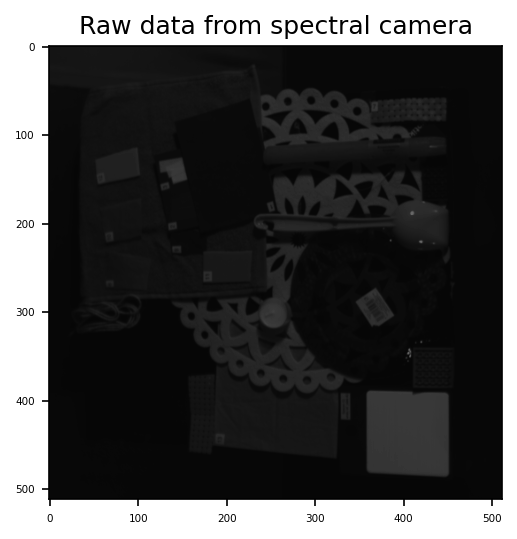

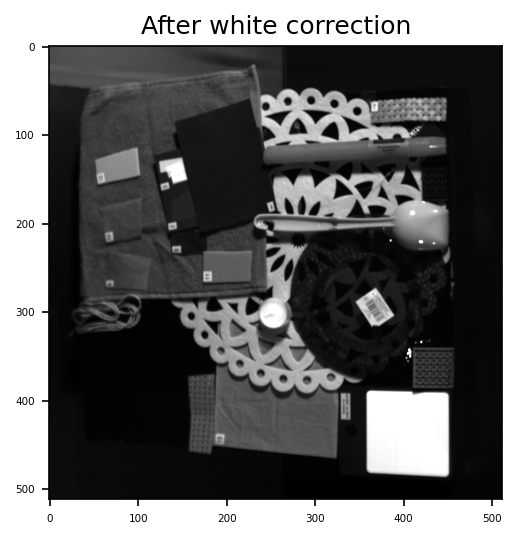

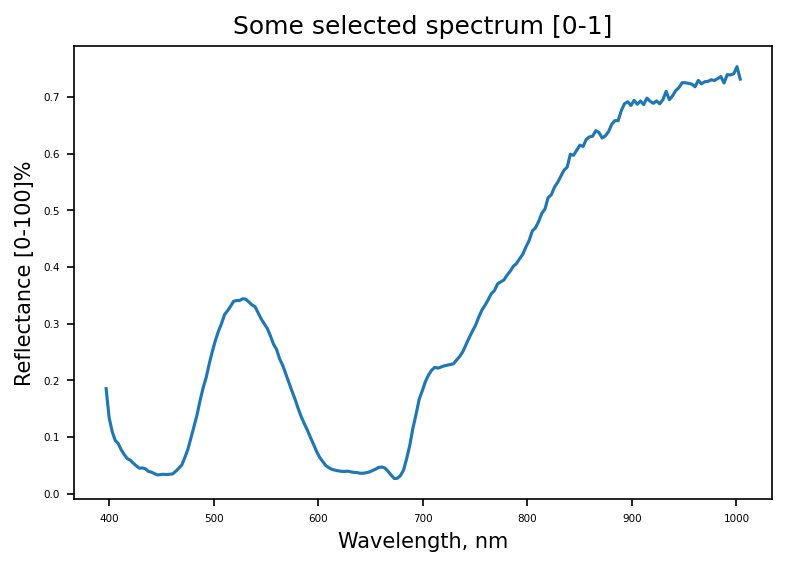

In [ ]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_image[:,100,:], cmap="gray", vmin=0, vmax=10050)#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,100,:], cmap="gray", vmin=0, vmax= 1)#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.plot(waves, spectral_cube[300,:,400])#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

660.84
542.68
455.16


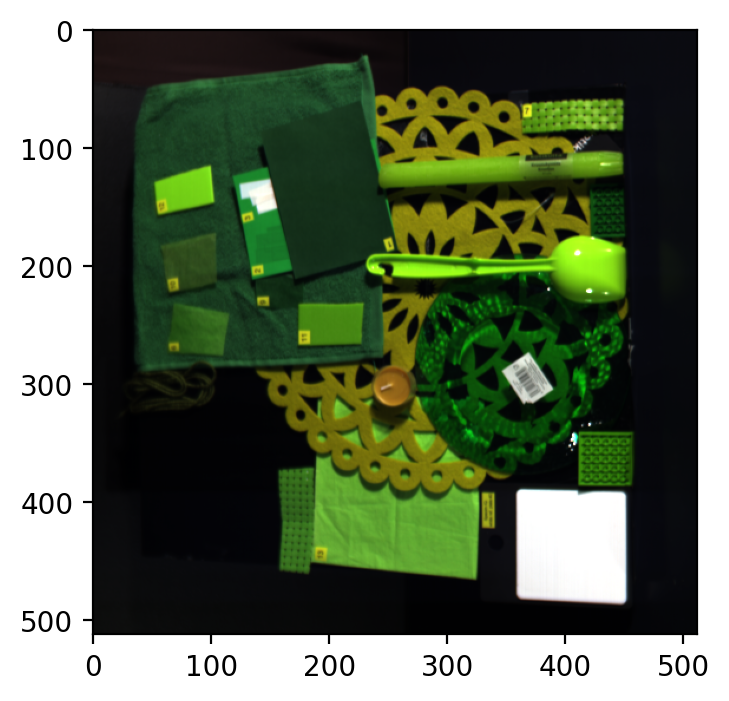

In [ ]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 90
ch_2 = 50
ch_3 = 20
print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)

plt.show()

[0.12188491 0.28229886 0.14952153]


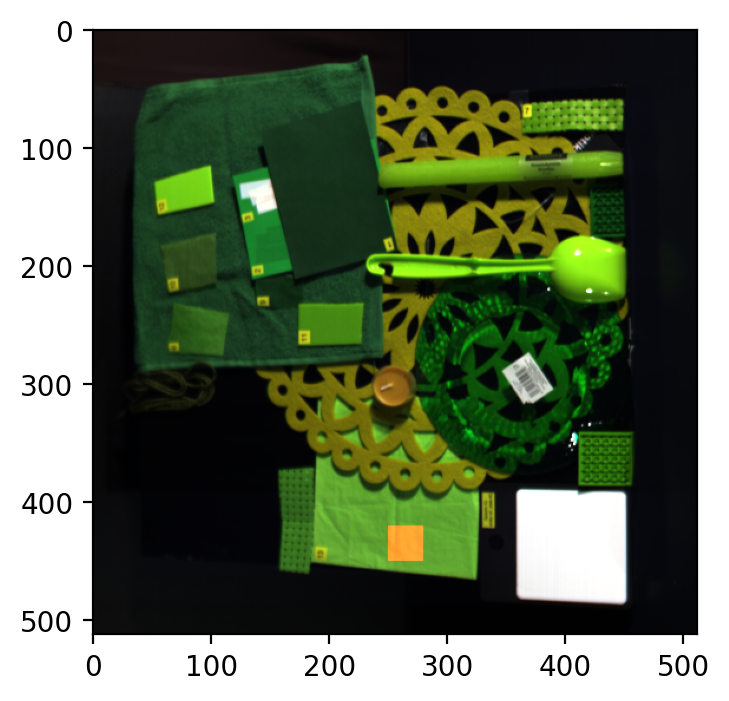

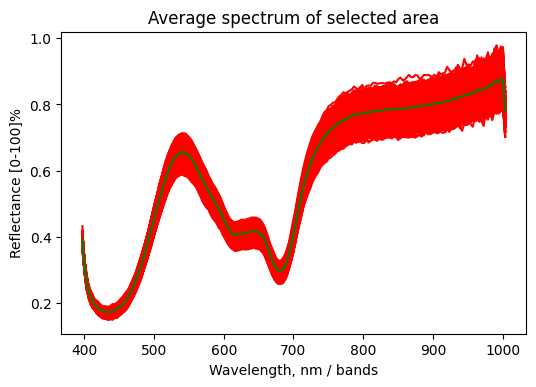

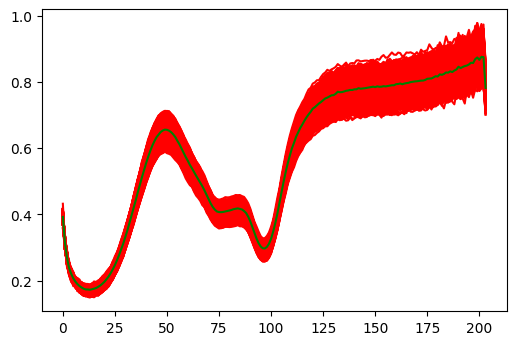

In [ ]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################
# Select plastic leaf

# ----- Green ----
x1 = 420
x2 = 450
y1 = 250
y2 = 280


plt.rcParams['figure.dpi'] = 200

RGB2[x1:x2,y1:y2,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
#print(spectral_cube.shape)
#print(plastic.shape)

sel1 = numpy.sum(sel, axis = 0)
#print(pl1.shape)
selection1 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
#print(pl2.shape)

##################################################################

plt.imshow(RGB2)
plt.rcParams['figure.dpi'] = 100
plt.show()


plt.figure()
for i in range(30):
  plt.plot(waves, sel[i,:,], 'r') #plt.plot(waves,selection1)
  
plt.plot(waves, selection1, 'g') #plt.plot(waves,selection1)
plt.xlabel('Wavelength, nm / bands')
plt.ylabel('Reflectance [0-100]%')
plt.title("Average spectrum of selected area")
plt.show()

plt.figure()
for i in range(30):
  plt.plot(sel[i,:,], 'r') #plt.plot(waves,selection1)
plt.plot(selection1, 'g') #plt.plot(waves,selection1)

plt.show()

512 204 512
25
30
100
110
RGB:  (512, 512, 3)
cube:  (512, 204, 512)
small cube:  (512, 512, 4)


3.6609685
2.7101243
4.611244


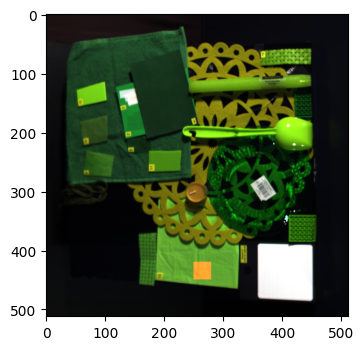

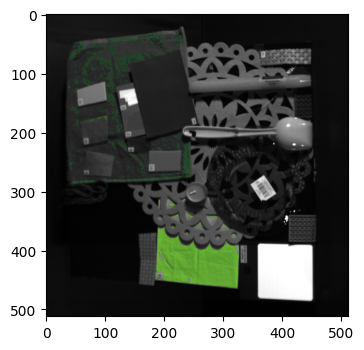

In [ ]:
# Generate Band based condition
n = 4 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 25
bbands[1] = 30
bbands[2] = 100
bbands[3] = 110

selected = selection1.copy()

###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n):
  ratio[i] = selected[bbands[i]]
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
mask = RGB.copy()

for i in range(s1):  #s1
  for j in range(s3): #s3
    criteria = 0
    for ch in range(n):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch]-ratio[ch]))>0.08: #[0.02 - 0.18] threshold
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=gray_color
        mask[i,j,1]=gray_color
        mask[i,j,2]=gray_color                       
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 100
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 100
plt.imshow(mask)

plt.show()

#Tuneable (T1)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import os

In [ ]:

dirpath = dirpath = "/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects"
myDir = os.listdir(dirpath)
# Read the first image define it size, define the total number of Images and get the size of future ENVI Spectral Cube
fullpath = os.path.join(dirpath, myDir[0])
im = Image.open(fullpath) 
single_slice = numpy.array(im)
[lines, samples] = single_slice.shape 
spectral = 10
print(lines, samples, spectral)

# save as integers, data type = 12
spectral_cube = numpy.ndarray(shape=(lines,spectral,samples), dtype=numpy.uint16)
print(spectral_cube.shape)

band=0
for i in range(1,11):
  # prepare file path ################
  dirpath = dirpath = "/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects"
  ext = ".png"
  filename = f"Green objects, ch {i}, exp 125 ms{ext}"
  print(filename)
  fullpath = os.path.join(dirpath, filename)
  print(fullpath)
  print(i)  
  print(band)
  ####################################

  im = Image.open(fullpath) 
  single_slice = numpy.array(im)
  #print(imarray.shape)
  spectral_cube[:,band,:]=single_slice
  band = band + 1



720 1280 10
(720, 10, 1280)
Green objects, ch 1, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 1, exp 125 ms.png
1
0
Green objects, ch 2, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 2, exp 125 ms.png
2
1
Green objects, ch 3, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 3, exp 125 ms.png
3
2
Green objects, ch 4, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 4, exp 125 ms.png
4
3
Green objects, ch 5, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 5, exp 125 ms.png
5
4
Green objects, ch 6, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 6, exp 125 ms.png
6
5
Green objects, ch 7, exp 125 ms.png
/content/drive/MyDrive/ASI/Lab4/Task1/tuneable/ext/Green objects/Green objects, ch 7, exp 

uint8


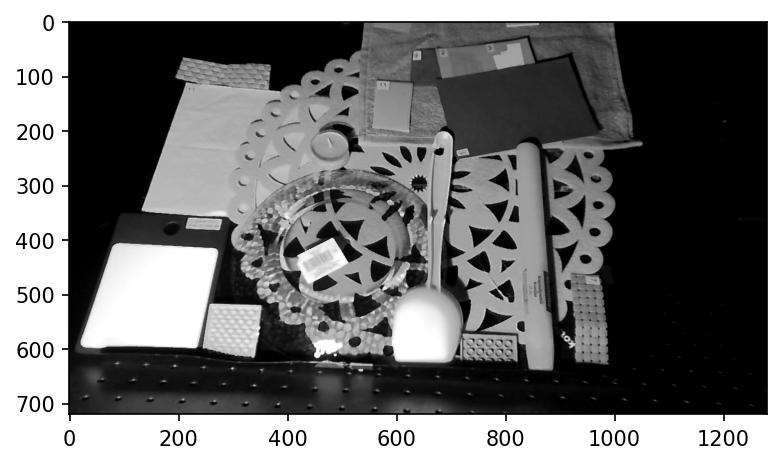

In [ ]:
plt.imshow(spectral_cube[:,5,:], cmap="gray")
print(single_slice.dtype)
plt.show()

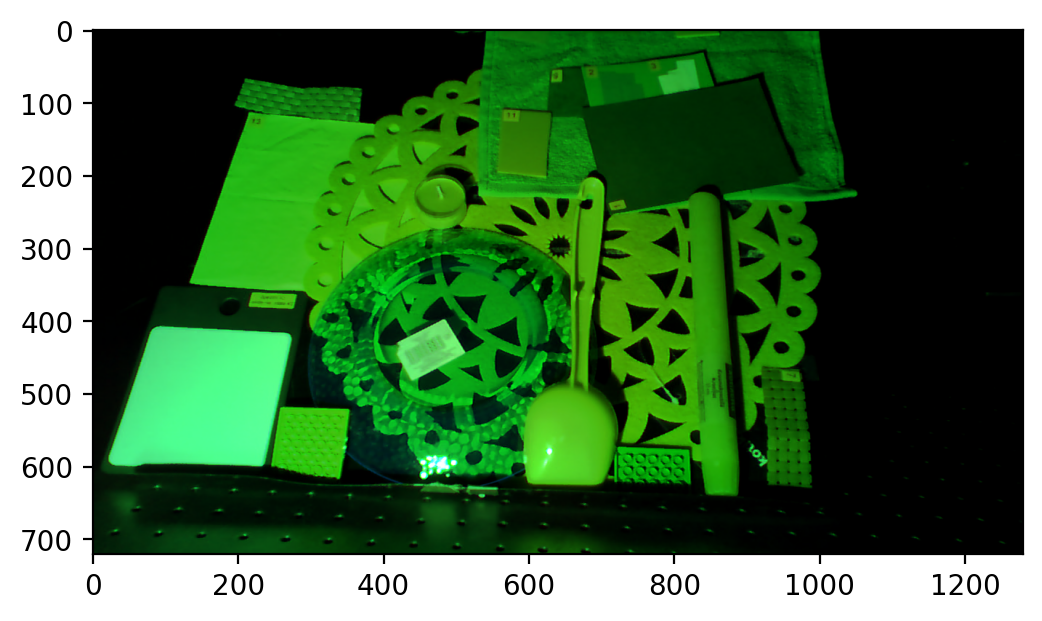

In [ ]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 9
ch_2 = 4
ch_3 = 0

RGB[:,:,0] = spectral_cube[:,ch_1,:]/numpy.amax(spectral_cube[:,ch_1,:])
RGB[:,:,1] = spectral_cube[:,ch_2,:]/numpy.amax(spectral_cube[:,ch_2,:])
RGB[:,:,2] = spectral_cube[:,ch_3,:]/numpy.amax(spectral_cube[:,ch_3,:])
# RGB[:,:,0] = spectral_cube[:,ch_1,:]
# RGB[:,:,1] = spectral_cube[:,ch_2,:]
# RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)

plt.show()

[0. 0. 0.]


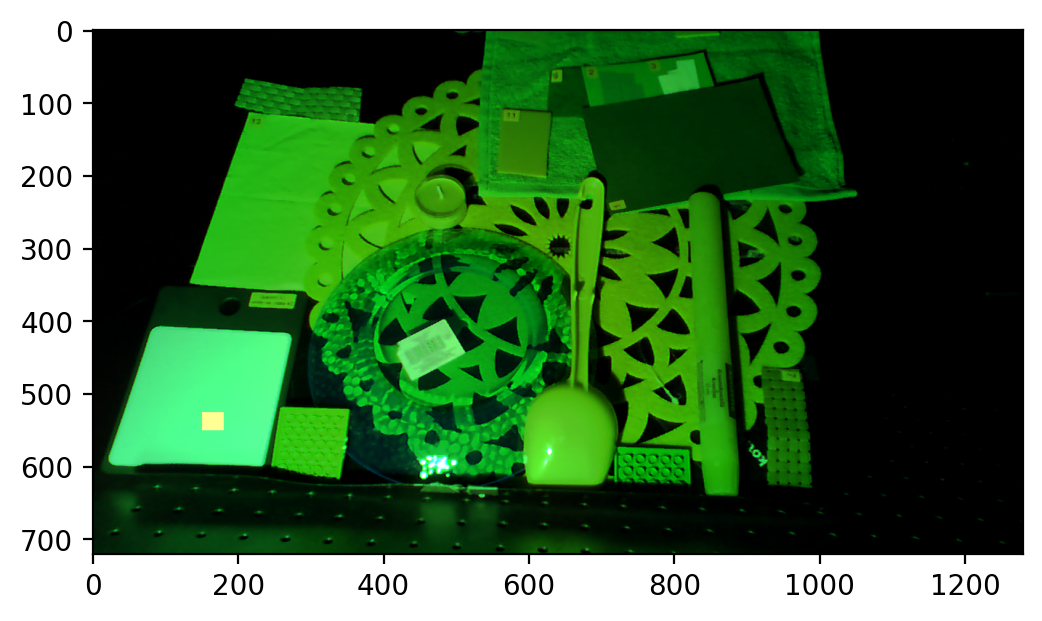

In [ ]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################

# ----- White ----
x1 = 525
x2 = 550
y1 = 150
y2 = 180

plt.rcParams['figure.dpi'] = 200

RGB2[x1:x2,y1:y2,0] = 255

plt.imshow(RGB2)

In [ ]:
white_av = numpy.mean(spectral_cube[x1:x2, :, y1:y2], axis=(0, 2), keepdims=True)

In [ ]:
spectral_cube_before = spectral_cube.copy()

In [ ]:
spectral_cube = spectral_cube / white_av

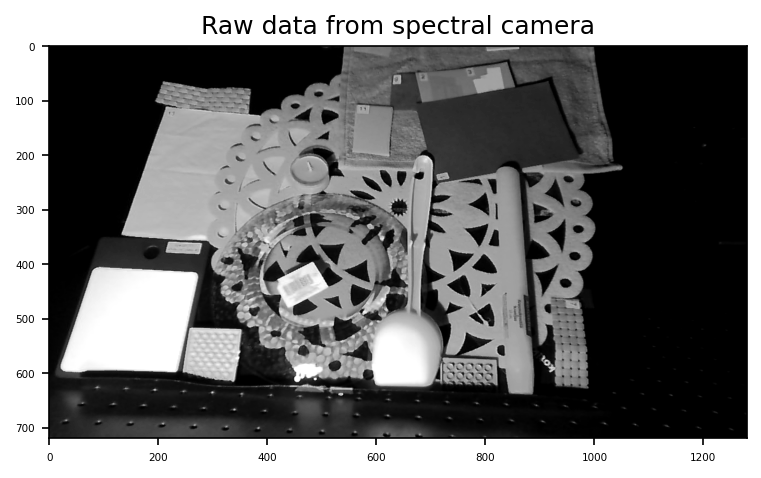

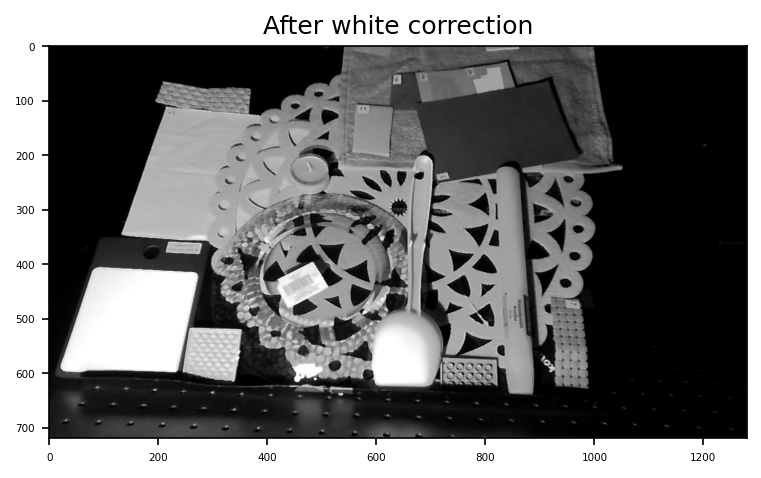

In [ ]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_cube_before[:,5,:], cmap="gray")#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,5,:], cmap="gray")#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

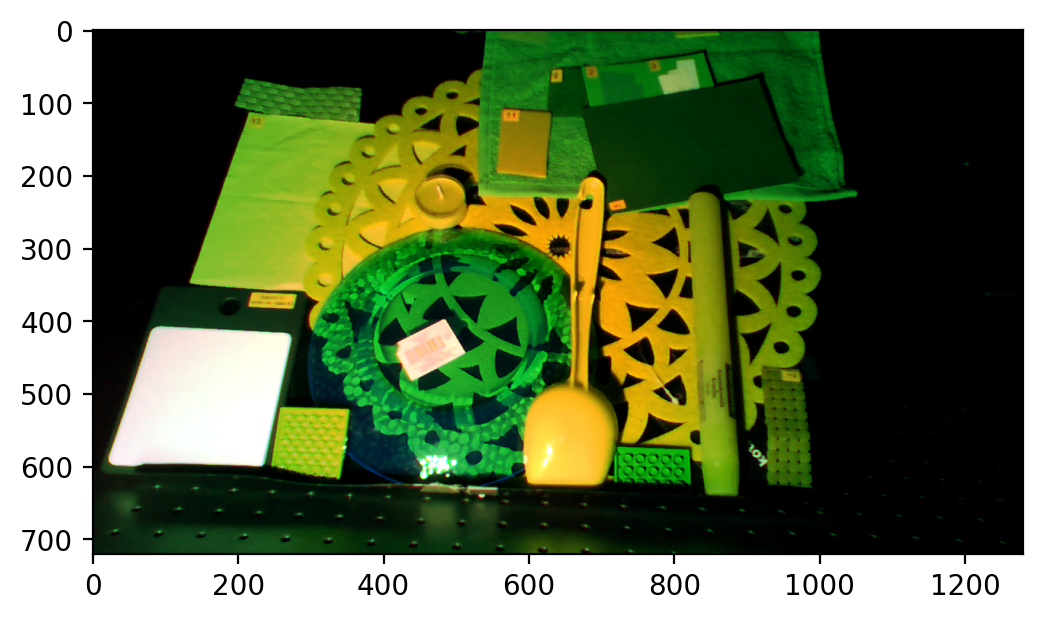

In [ ]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB3 = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 9
ch_2 = 4
ch_3 = 0

# RGB3[:,:,0] = spectral_cube[:,ch_1,:]/numpy.amax(spectral_cube[:,ch_1,:])
# RGB3[:,:,1] = spectral_cube[:,ch_2,:]/numpy.amax(spectral_cube[:,ch_2,:])
# RGB3[:,:,2] = spectral_cube[:,ch_3,:]/numpy.amax(spectral_cube[:,ch_3,:])
RGB3[:,:,0] = spectral_cube[:,ch_1,:]
RGB3[:,:,1] = spectral_cube[:,ch_2,:]
RGB3[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB3)

plt.show()

[0. 0. 0.]


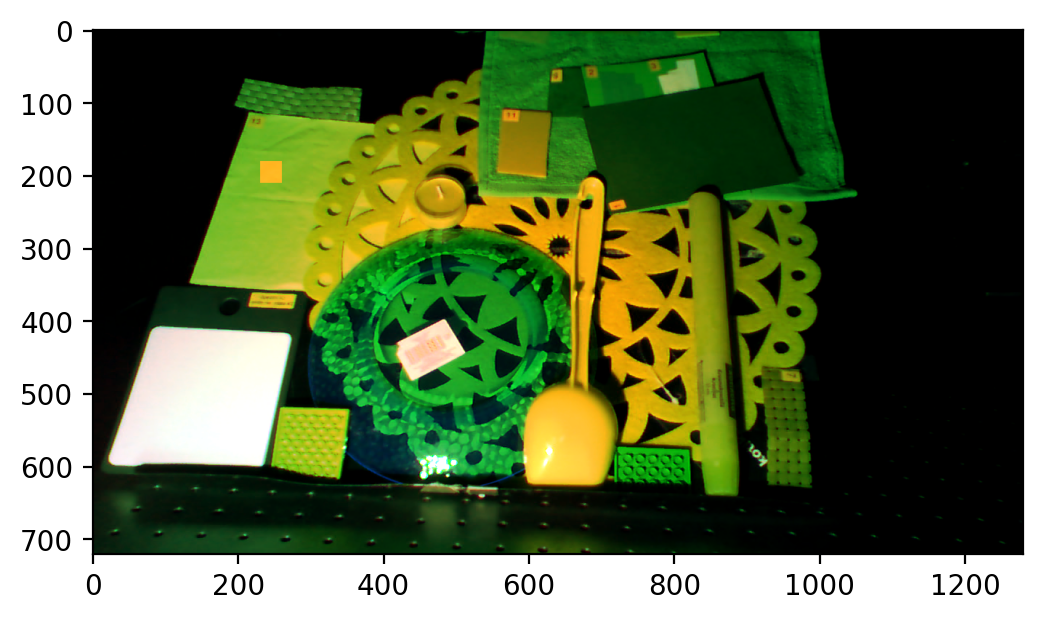

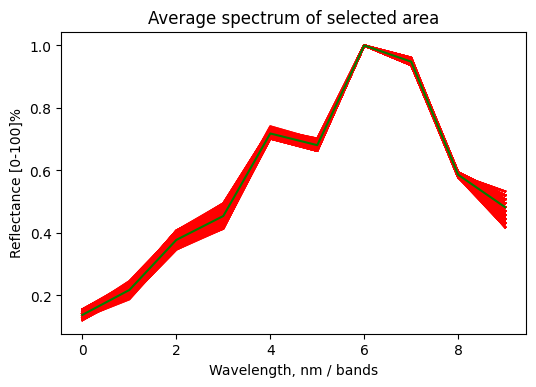

In [ ]:
# Selct area and plot its avearage spectrum
print(RGB3[100,100,:])
RGB2 = RGB3.copy()
##################################################################
# Select plastic leaf

# ----- Green ----
x1 = 180
x2 = 210
y1 = 230
y2 = 260


plt.rcParams['figure.dpi'] = 200

RGB2[x1:x2,y1:y2,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
#print(spectral_cube.shape)
#print(plastic.shape)

sel1 = numpy.sum(sel, axis = 0)
#print(pl1.shape)
selection1 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
#print(pl2.shape)

##################################################################

plt.imshow(RGB2)
plt.rcParams['figure.dpi'] = 100
plt.show()


plt.figure()
for i in range(30):
  plt.plot(sel[i,:,], 'r') #plt.plot(waves,selection1)
  
plt.plot(selection1, 'g') #plt.plot(waves,selection1)
plt.xlabel('Wavelength, nm / bands')
plt.ylabel('Reflectance [0-100]%')
plt.title("Average spectrum of selected area")

plt.show()

720 10 1280
4
6
7
RGB:  (720, 1280, 3)
cube:  (720, 10, 1280)
small cube:  (720, 1280, 3)


1.0
0.7647059
1.0


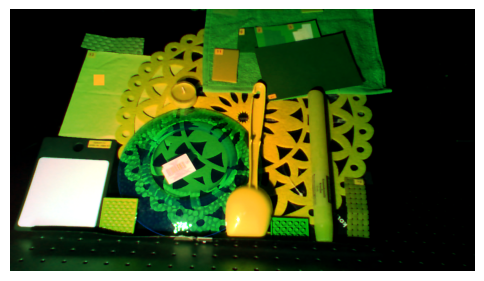

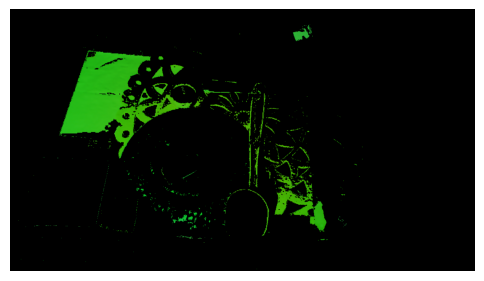

In [ ]:
# Generate Band based condition
n = 3 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 1
bbands[1] = 3
bbands[2] = 7

selected = selection1.copy()

###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n):
  ratio[i] = selected[bbands[i]]
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
mask = RGB.copy()

for i in range(s1):  #s1
  for j in range(s3): #s3
    criteria = 0
    for ch in range(n):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch]-ratio[ch]))>0.05: #[0.02 - 0.18] threshold
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=0
        mask[i,j,1]=0
        mask[i,j,2]=0                       
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 100
plt.axis('off')
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 100
plt.axis('off')
plt.imshow(mask)

plt.show()

#Scanner (T1)

In [ ]:
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR) ###########################################################
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  
import os
import numpy

##### Read HDR content ##################################################################################################
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          #print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    waves = numpy.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        waves[n] = float(filelines[i].replace(',',''))
        n = n + 1
    
    return samples, bands, lines, waves

# Resize ENVI with given spectral binning #############################################################################
def resize_ENVI(envi_raw, envi_hdr, save_path, spectral_binning, spatial_binning, waves):

  # 1. Read object file
  [samples, bands, lines, waves] = read_hdr(envi_hdr)
  # Define new size
  sample = numpy.empty(samples, dtype=numpy.uint16)
  s = sample[::spatial_binning]
  newsamples = s.shape[0]
  line = numpy.empty(lines, dtype=numpy.uint16)
  l = line[::spatial_binning]
  newlines = l.shape[0]
  band = numpy.empty(bands, dtype=numpy.uint16)
  b = band[::spectral_binning]
  newbands = b.shape[0]
  # Resize
  resized_cube = numpy.empty((newlines, newbands, newsamples), dtype=numpy.uint16)
  data_portion = samples*bands
  fopen = open(envi_raw, "rb")
  nu = 0
  for i in range(0,newlines): 
    #print(i)
    # SKIP SOME BYTES [data_portion*2*i]
    fopen.seek(data_portion*2*i*spatial_binning) # binning, 2 bytes for unint16
    # READ ONLY SOME BYTES [count = number of bytes to skip)]
    raw_image = numpy.fromfile(fopen, dtype=numpy.uint16, count=data_portion)# Read line
    cube_part = numpy.reshape(raw_image, (1, bands, samples))
    part =  cube_part[0,::spectral_binning,::spatial_binning]
    resized_cube[i,:,:] = part
  fopen.close()
  print('Resized cube size:', resized_cube.shape)
  newwaves = waves[::spectral_binning]
  return resized_cube, newlines, newsamples, newbands, newwaves

# save both hdr and raw ############################################################################################
def save_hdr(load_hdr_path, load_raw_path, resized_cube, newwaves):
  newlines, newbands, newsamples = resized_cube.shape
  print(newsamples, newbands, newlines)
  # create save hdr path in 'resized'
  path = load_hdr_path
  res = path.split(os.sep)
  # res[-2] = 'resized'
  save_hdr_path= os.path.join('/',*res)
  print(load_hdr_path)
  print(save_hdr_path)
  # create save raw path in 'resized'
  path = load_raw_path
  res = path.split(os.sep)
  # res[-2] = 'resized'
  save_raw_path= os.path.join('/',*res)
  print(load_raw_path)
  print(save_raw_path)

  #save modified hdr
  f = open(save_hdr_path, "w")
  f.writelines('ENVI'+'\n')
  f.writelines('\n')
  f.writelines('samples = '+str(newsamples)+'\n')
  f.writelines('bands = '+str(newbands)+'\n')
  f.writelines('lines = '+str(newlines)+'\n')
  f.writelines('interleave = bil'+'\n')
  f.writelines('data type = 12'+'\n')
  f.writelines('header offset = 0'+'\n')
  f.writelines('byte order = 0'+'\n')
  f.writelines('\n')
  f.writelines('Wavelength = {'+'\n')
  for wave in newwaves:
    f.writelines(str(wave)+','+'\n')
  f.writelines('}'+'\n')
  f.close()
  # save resized cube
  resized_cube.tofile(save_raw_path)

In [ ]:
# Read hdr
path = "/content/drive/MyDrive/ASI/Lab4/Task1/scanner/ext/capture"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
[samples, bands, lines, waves] = read_hdr(object_hdr)

open_path = object_raw
# Read raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)

/content/drive/MyDrive/ASI/Lab4/Task1/scanner/ext/capture/IR-green_scan_0095.raw
spectral_image.shape:  (311, 256, 320)


In [ ]:
raw_image = None

Text(0.5, 1.0, 'Single spectrum')

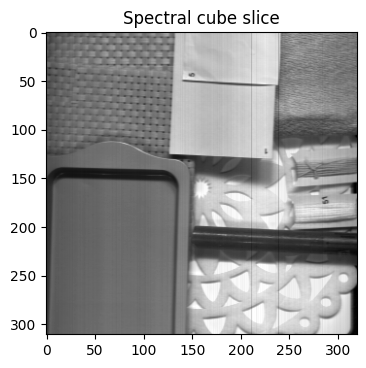

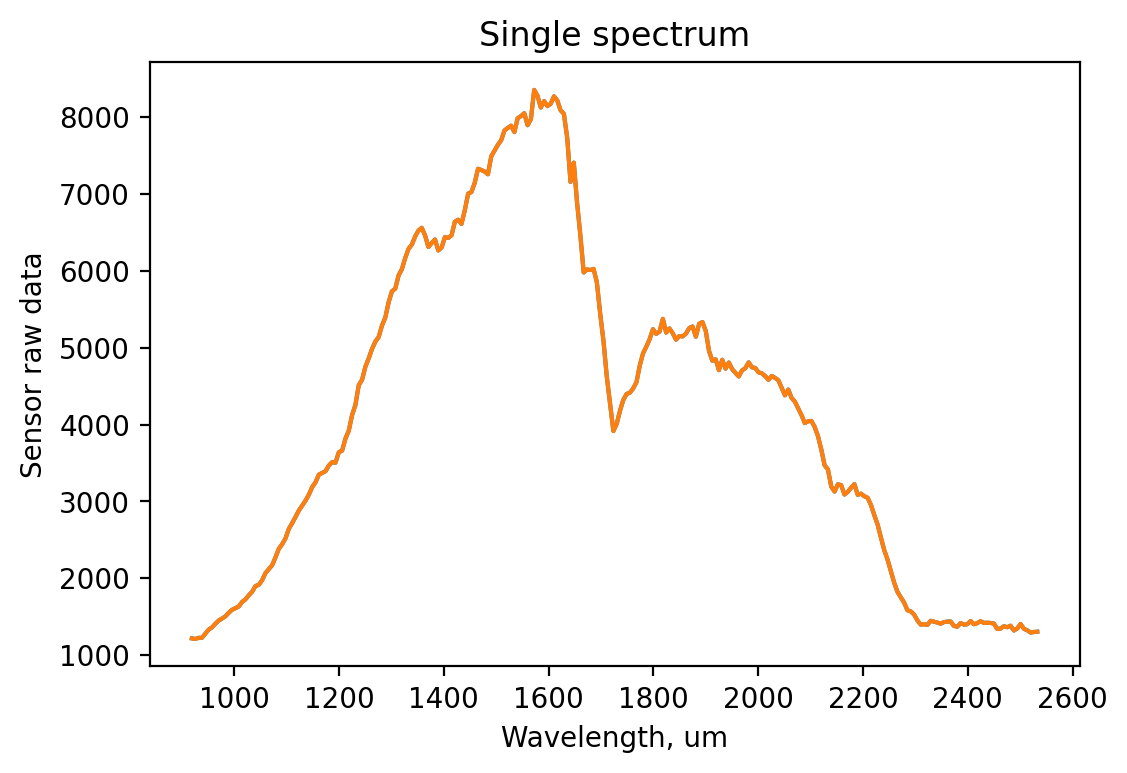

In [ ]:
# Plot picture and spectrum
plt.imshow(spectral_image[:,100,:], cmap="gray")
plt.title('Spectral cube slice')
plt.rcParams['figure.dpi'] = 200

plt.figure()
plt.plot(waves, spectral_image[100,:,100])
plt.plot(waves, spectral_image[100,:,100])#
plt.xlabel('Wavelength, um')
plt.ylabel('Sensor raw data')
plt.rcParams['figure.dpi'] = 150
plt.title('Single spectrum')

/content/drive/MyDrive/ASI/Lab4/Task1/scanner/ext/capture/WHITEREF_IR-green_scan_0095.hdr
320 256 190


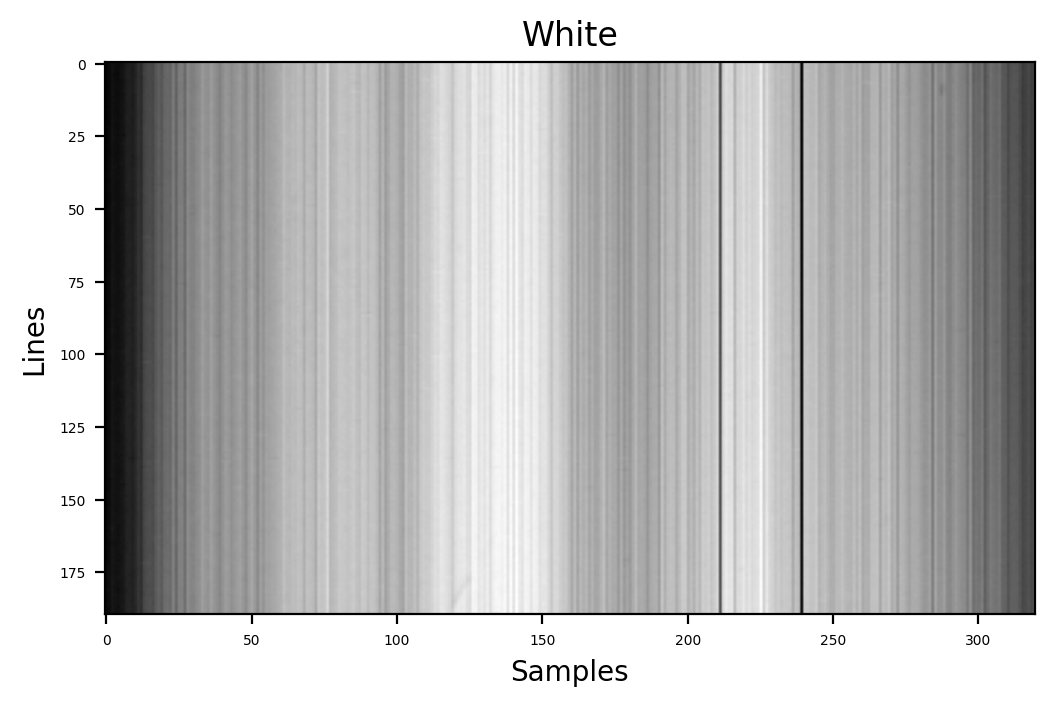

white samples, bands, and lines 320, 256, 190


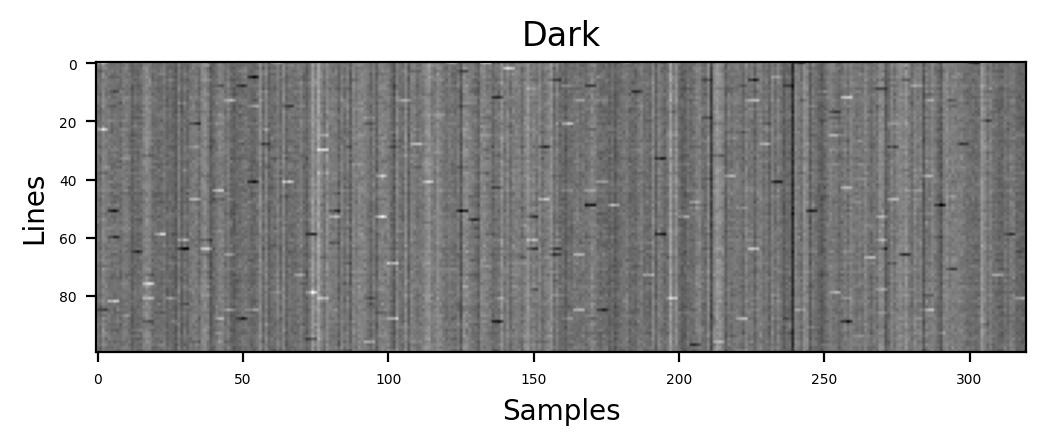

dark samples, bands, and lines 320, 256, 100


In [ ]:
# Read White
print(white_hdr)
[samples, bands, lines, waves] = read_hdr(white_hdr)
print(samples, bands, lines)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines

raw_image = None

plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,100,:], cmap="gray")#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
print(f'white samples, bands, and lines {samples}, {bands}, {lines}')
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines

raw_image = None

plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,100,:], cmap="gray")#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()
print(f'dark samples, bands, and lines {samples}, {bands}, {lines}')

In [ ]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = numpy.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = numpy.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
spectral_cube = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = numpy.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = numpy.subtract(white_av, dark_av) 
# Subtract [image - dark]
for i in range(lines):
  spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube


(311, 256, 320)


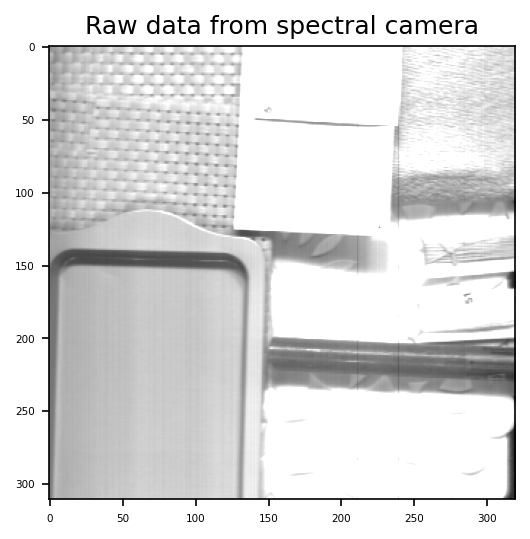

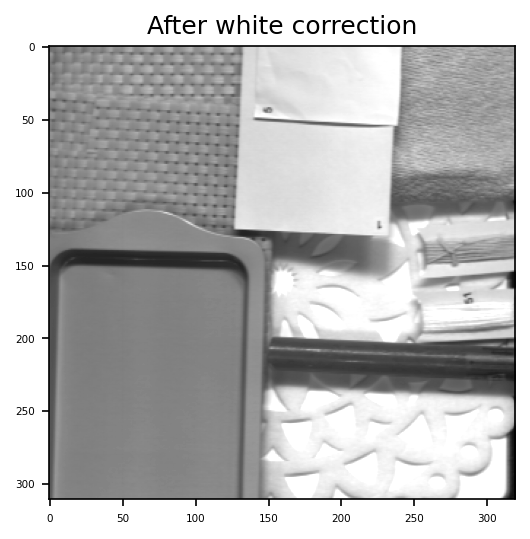

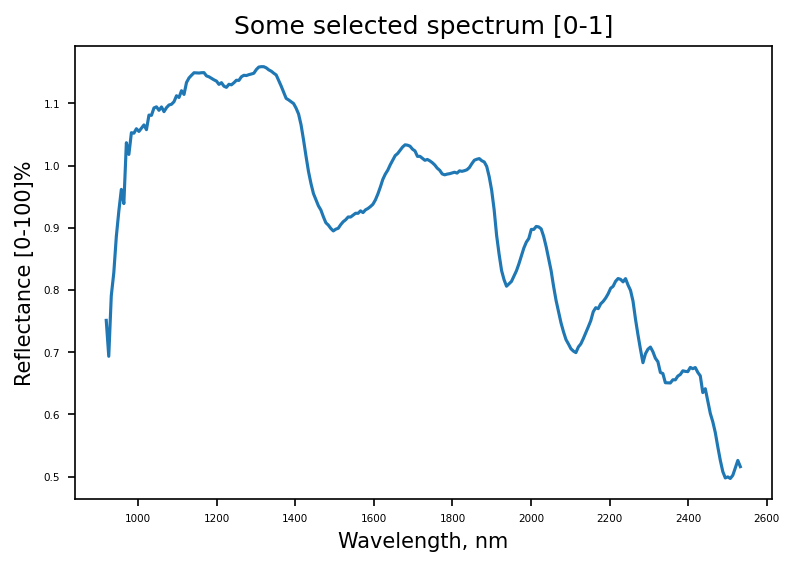

In [ ]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_image[:,100,:], cmap="gray", vmin=0, vmax=10050)#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,100,:], cmap="gray", vmin=0, vmax= 1)#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.plot(waves, spectral_cube[100,:,200])#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()

2057.39
1553.5
1046.76


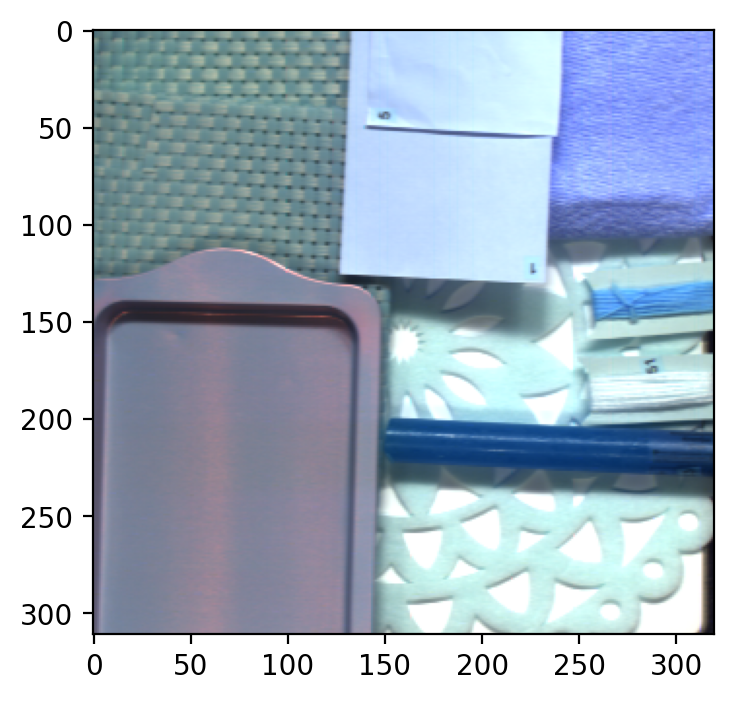

In [ ]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 180
ch_2 = 100
ch_3 = 20
print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)

plt.show()

[0.41701207 0.5267401  0.54070747]


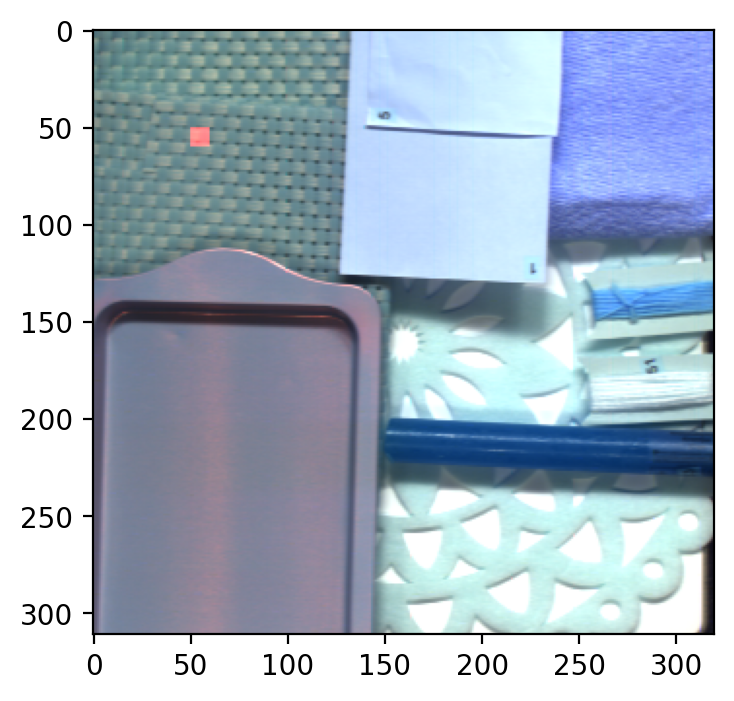

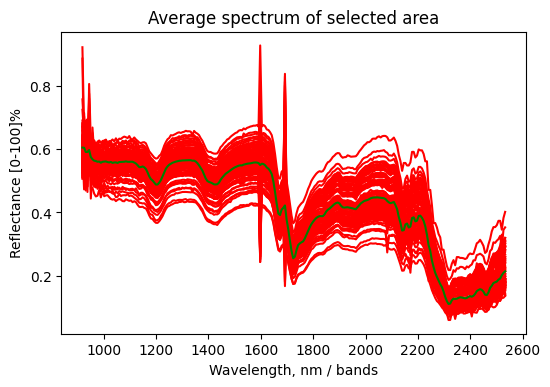

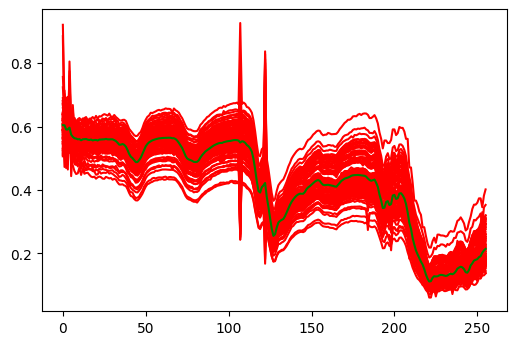

In [ ]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################
# Select plastic leaf

# ----- Green ----
x1 = 50
x2 = 60
y1 = 50
y2 = 60


plt.rcParams['figure.dpi'] = 200

RGB2[x1:x2,y1:y2,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
#print(spectral_cube.shape)
#print(plastic.shape)

sel1 = numpy.sum(sel, axis = 0)
#print(pl1.shape)
selection1 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
#print(pl2.shape)

##################################################################

plt.imshow(RGB2)
plt.rcParams['figure.dpi'] = 100
plt.show()


plt.figure()
for i in range(10):
  plt.plot(waves, sel[i,:,], 'r') #plt.plot(waves,selection1)
  
plt.plot(waves, selection1, 'g') #plt.plot(waves,selection1)
plt.xlabel('Wavelength, nm / bands')
plt.ylabel('Reflectance [0-100]%')
plt.title("Average spectrum of selected area")
plt.show()

plt.figure()
for i in range(10):
  plt.plot(sel[i,:,], 'r') #plt.plot(waves,selection1)
plt.plot(selection1, 'g') #plt.plot(waves,selection1)

plt.show()

311 256 320
28
70
25
110
220
245
RGB:  (311, 320, 3)
cube:  (311, 256, 320)
small cube:  (311, 320, 6)


1.5259408
0.62825954
1.3869067


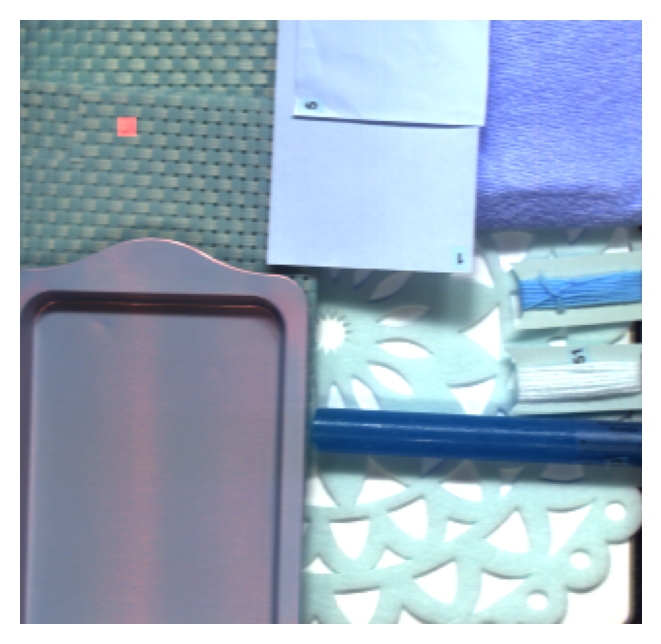

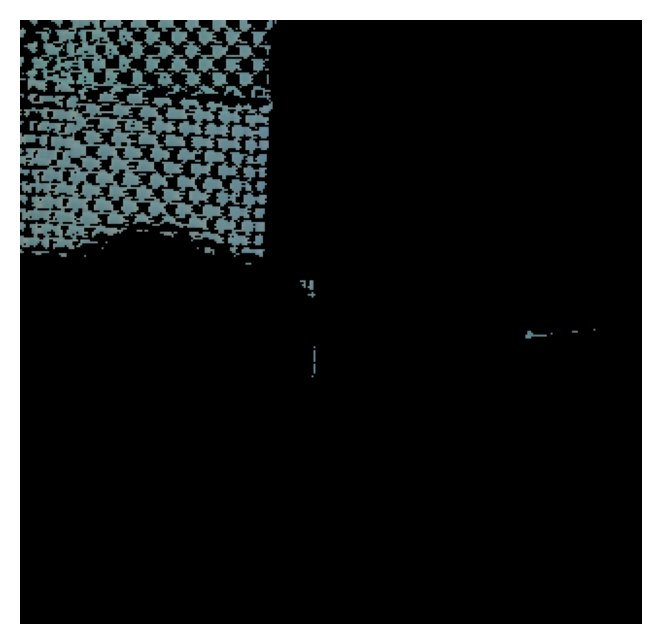

In [ ]:
# Generate Band based condition
n = 6 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 28
bbands[1] = 70
bbands[2] = 25
bbands[3] = 110
bbands[4] = 220
bbands[5] = 245

selected = selection1.copy()

###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n):
  ratio[i] = selected[bbands[i]]
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
mask = RGB.copy()

for i in range(s1):  #s1
  for j in range(s3): #s3
    criteria = 0
    for ch in range(n):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch]-ratio[ch]))>0.05: #[0.02 - 0.18] threshold
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=0
        mask[i,j,1]=0
        mask[i,j,2]=0                       
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.imshow(mask)

plt.show()